# Visualize results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Compression 

In [2]:
df_comp = pd.read_csv("../results/data/Compression_Eval.csv", sep=";")

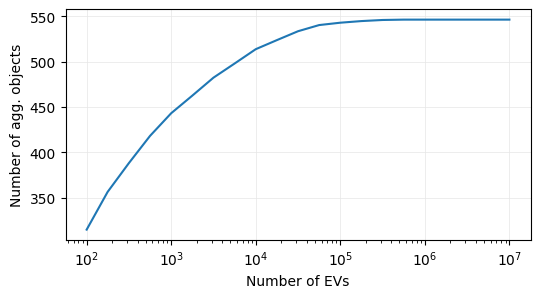

In [19]:
f, ax = plt.subplots(figsize=(6, 3))
_ = ax.grid(linewidth=0.5, color="0.9")
_ = ax.set_axisbelow(True)
df = df_comp.groupby(["Number of Agents"]).mean(numeric_only=True).reset_index()
_ = ax.plot(df["Number of Agents"], df["Aggregated number"])
#_ = ax.set_xticks([i for i in range(0, 10**6, 2 * 10**5)], labels=[f"{i:.0e}" for i in range(0, 10**6, 2 * 10**5)])
_ = ax.set_xscale("log")
_ = ax.set_xlabel("Number of EVs")
_ = ax.set_ylabel("Number of agg. objects")
_ = f.savefig("../results/figures/Compression.pdf", dpi=300, bbox_inches="tight")

## Parameter tuning

In [20]:
def plot_hm(df, ax, f):
    x = df.columns
    y = df.index
    c = df.values
    im = ax.pcolormesh(x, y, c, cmap="magma", lw=0, rasterized=True)
    _ = ax.set_xlabel(df.columns.name)
    _ = ax.set_ylabel(df.index.name)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.05)
    cb = f.colorbar(im, cax=cax, orientation='vertical')
    _ = cb.outline.set_linewidth(0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


In [21]:
# Load data
df_fo = pd.read_csv("../results/data/Param_tuning_FO.csv", sep=";")
df_dfo = pd.read_csv("../results/data/Param_tuning_DFO.csv", sep=";")
df_vbsoe = pd.read_csv("../results/data/Param_tuning_VBFSOE.csv", sep=";")
df_vbgrpd = pd.read_csv("../results/data/Param_tuning_VBFGRPD.csv", sep=";")

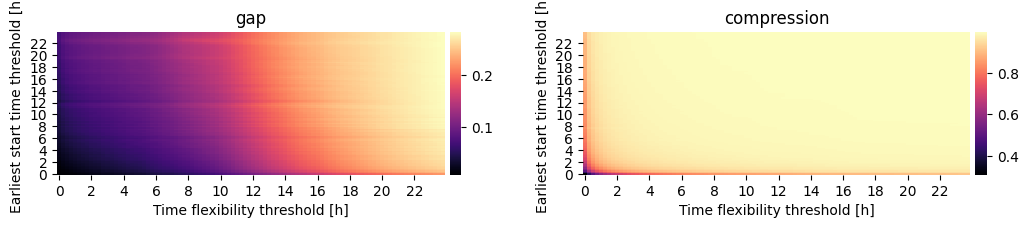

In [22]:
f, ax = plt.subplots(1, 2, figsize=(12, 2.1), gridspec_kw={"wspace":0.3})

time_ticks = list(range(0, 96, 8))
time_labels = list(range(0, 24, 2))

# FO
#_ = f.suptitle('Flex Objects')
#_ = f.subplots_adjust(top=0.8)
hm_df = df_fo.groupby(["Earliest start time", "Time flexibility"]).mean().drop(columns=["Seed"]).reset_index()
_ = plot_hm(hm_df.pivot(index="Earliest start time", columns="Time flexibility", values="Gap"), ax[0], f)
_ = plot_hm(hm_df.pivot(index="Earliest start time", columns="Time flexibility", values="Compression"), ax[1], f)
_ = ax[0].set_title("gap")
_ = ax[1].set_title("compression")

for a in [ax[0], ax[1]]:
    _ = a.set_ylabel("Earliest start time threshold [h]")
    _ = a.set_xlabel("Time flexibility threshold [h]")
    _ = a.set_xticks(time_ticks, labels=time_labels)
    _ = a.set_yticks(time_ticks, labels=time_labels)

_ = f.subplots_adjust(bottom=0.2)

_ = f.savefig("../results/figures/FO_PM.pdf", dpi=300)

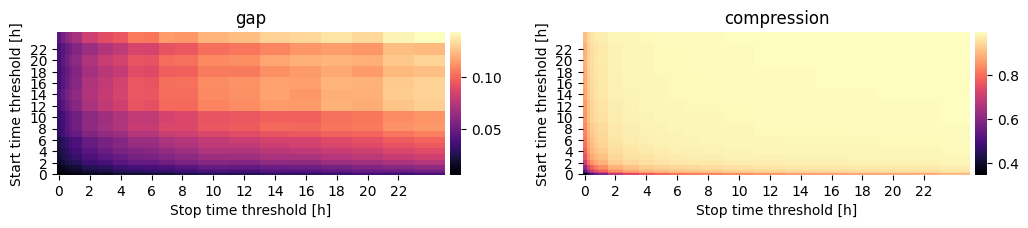

In [23]:
f, ax = plt.subplots(1, 2, figsize=(12, 2.1), gridspec_kw={"wspace":0.3})

time_ticks = list(range(0, 96, 8))
time_labels = list(range(0, 24, 2))

# DFO
#_ = f.suptitle('Dependency-based FlexOffers')
#_ = f.subplots_adjust(top=0.8)
hm_df = df_dfo.groupby(["Earliest start time", "Stop time"]).mean().drop(columns=["Seed"]).reset_index()
_ = plot_hm(hm_df.pivot(index="Earliest start time", columns="Stop time", values="Gap"), ax[0], f)
_ = plot_hm(hm_df.pivot(index="Earliest start time", columns="Stop time", values="Compression"), ax[1], f)
_ = ax[0].set_title("gap")
_ = ax[1].set_title("compression")
for a in [ax[0], ax[1]]:
    _ = a.set_ylabel("Start time threshold [h]")
    _ = a.set_xlabel("Stop time threshold [h]")
    _ = a.set_xticks(time_ticks, labels=time_labels)
    _ = a.set_yticks(time_ticks, labels=time_labels)

_ = f.subplots_adjust(bottom=0.2)
_ = f.savefig("../results/figures/DFO_PM.pdf", dpi=300)

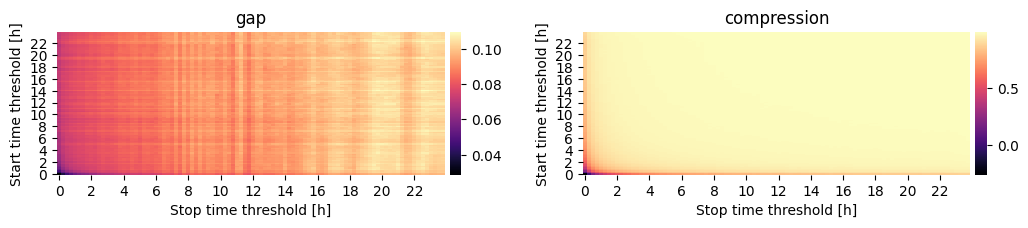

In [24]:
f, ax = plt.subplots(1, 2, figsize=(12, 2.1), gridspec_kw={"wspace":0.3})

time_ticks = list(range(0, 96, 8))
time_labels = list(range(0, 24, 2))

# VB-GRPD
#_ = f.suptitle('Virtual battery grouped')
#_ = f.subplots_adjust(top=0.8)
hm_df = df_vbgrpd.groupby(["Earliest start time", "Stop time"]).mean().drop(columns=["Seed"]).reset_index()
_ = plot_hm(hm_df.pivot(index="Earliest start time", columns="Stop time", values="Gap"), ax[0], f)
_ = plot_hm(hm_df.pivot(index="Earliest start time", columns="Stop time", values="Compression"), ax[1], f)
_ = ax[0].set_title("gap")
_ = ax[1].set_title("compression")
for a in [ax[0], ax[1]]:
    _ = a.set_ylabel("Start time threshold [h]")
    _ = a.set_xlabel("Stop time threshold [h]")
    _ = a.set_xticks(time_ticks, labels=time_labels)
    _ = a.set_yticks(time_ticks, labels=time_labels)

_ = f.subplots_adjust(bottom=0.2)
_ = f.savefig("../results/figures/VBGRPD_PM.pdf", dpi=300)

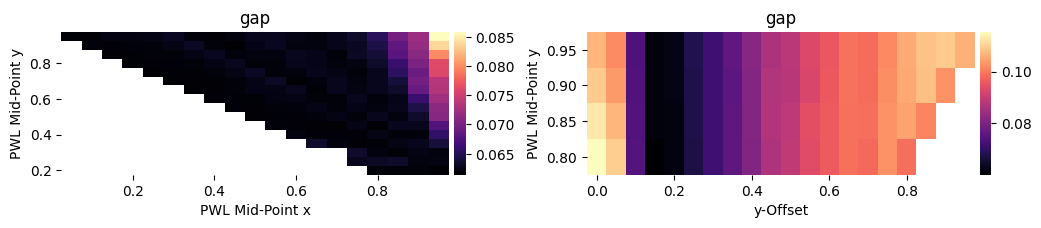

In [25]:
f, ax = plt.subplots(1, 2, figsize=(12, 2.1), gridspec_kw={"wspace":0.3})

time_ticks = list(range(0, 96, 8))
time_labels = list(range(0, 24, 2))

# VB-GRPD
#_ = f.suptitle('Virtual battery with f(soe)')
#_ = f.subplots_adjust(top=0.8)
hm_df = df_vbsoe.groupby(["PWL Mid-Point x", "PWL Mid-Point y", "y-Offset"]).mean().drop(columns=["Seed"]).reset_index()
_ = plot_hm(hm_df[hm_df["y-Offset"] == 0.2].pivot(index="PWL Mid-Point y", columns="PWL Mid-Point x", values="Gap"), ax[0], f)
_ = plot_hm(hm_df[hm_df["PWL Mid-Point x"] == 0.2].pivot(index="PWL Mid-Point y", columns="y-Offset", values="Gap"), ax[1], f)
_ = ax[0].set_title("gap")
_ = ax[1].set_title("gap")
_ = f.subplots_adjust(bottom=0.2)
_ = f.savefig("../results/figures/VBFSOE_PM.pdf", dpi=300)

### Parameter choice:

In [7]:
compression_min = 0.95

In [8]:

df_fo_grpd = df_fo.groupby(["Earliest start time", "Time flexibility"]).mean()
df_fo_grpd[df_fo_grpd.Compression >= compression_min].sort_values("Gap").head(1)

,,Unnamed: 0,Seed,Gap,Compression
Earliest start time,Time flexibility,,,,
15,7,42919.0,4.5,0.050409,0.950066


In [9]:
df_dfo_grpd = df_dfo.groupby(["Earliest start time", "Stop time"]).mean()
df_dfo_grpd[df_dfo_grpd.Compression >= compression_min].sort_values("Gap").head(1)

,,Unnamed: 0,Seed,Num Sampels,Gap,Compression
Earliest start time,Stop time,,,,,
3,48,873.0,2.0,4.0,0.042278,0.956263


In [10]:
df_vbgrpd_grpd = df_vbgrpd.groupby(["Earliest start time", "Stop time"]).mean()
df_vbgrpd_grpd[df_vbgrpd_grpd.Compression >= compression_min].sort_values("Gap").head(1)

,,Unnamed: 0,Seed,Gap,Compression
Earliest start time,Stop time,,,,
33,8,21608.0,2.0,0.066235,0.967302


In [11]:
df_vbsoe_grpd = df_vbsoe.groupby(["PWL Mid-Point x", "PWL Mid-Point y", "y-Offset"]).mean()
df_vbsoe_grpd.sort_values("Gap").head(1)

,,,Unnamed: 0,Seed,Gap
PWL Mid-Point x,PWL Mid-Point y,y-Offset,,,
0.8,0.6,0.15,7198.0,2.0,0.058702


## Benchmarks

In [13]:
import cost_ts as cts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dfs = []
reps = 10
n_agent_options = [100, 1000, 10_000, 100_000, 1_000_000]
price_signals =  [cts.PriceSignal.SINE, cts.PriceSignal.REAL, cts.PriceSignal.FUTURE]
n_runs = reps * len(n_agent_options) * len(price_signals)
for n_agents in n_agent_options:
    for price_signal in price_signals:
        for seed in range(reps):
            dfs.append(
                pd.read_csv(f"../results/data/Benchmark_{seed}_{n_agents}_{price_signal}.csv", sep=";")
            )
benchmark_data = pd.concat(dfs)
benchmark_data["Price Signal"] = benchmark_data["Price Signal"].replace({"PriceSignal.SINE": "SINE", "PriceSignal.REAL": "REAL", "PriceSignal.FUTURE": "FUTURE"})
benchmark_data["Method"] = benchmark_data["Method"].replace(
    {
        "VB": "VB-LL", "VB-FSOE": "VB-LL-FPC", "VB-GRPD": "VB-LL-Grpd", "DFO_2": "DFO, nSmpls=2",
        "DFO_4": "DFO, nSmpls=4",  "DFO_6": "DFO, nSmpls=6",  "DFO_8": "DFO, nSmpls=8"
    }
)

# Create custom colormap
palette = {}
i = 0
for lbl in benchmark_data["Method"].unique():
    if lbl == "OPTIMAL": continue
    if lbl == "DFO, nSmpls=2":
        palette[lbl] = plt.get_cmap("tab20b")(12)
    elif lbl == "DFO, nSmpls=4":
        palette[lbl] = plt.get_cmap("tab20b")(13)
    elif lbl == "DFO, nSmpls=6":
        palette[lbl] = plt.get_cmap("tab20b")(14)
    elif lbl == "DFO, nSmpls=8":
        palette[lbl] = plt.get_cmap("tab20b")(15)
    else:
        if i == 3:
            i = 4
        palette[lbl] = plt.get_cmap("tab10")(i)
        i += 1

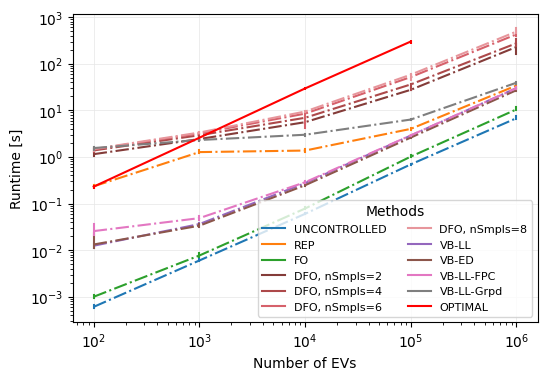

In [24]:
f, ax = plt.subplots(figsize=(6, 4))
_ = ax.grid(linewidth=0.5, color="0.9")
_ = ax.set_axisbelow(True)

def err_bar(x):
    return min(x), max(x)

sns.lineplot(
    y="Runtime_s", x="N_Agents", hue="Method", data=benchmark_data.loc[benchmark_data.Method != "OPTIMAL"],
    ax=ax, err_style="bars", errorbar=err_bar, linestyle="-.", palette=palette
)

# Plot OPTIMAL
optimal_mean = benchmark_data[benchmark_data.Method == "OPTIMAL"].groupby("N_Agents").mean(numeric_only=True)
x = optimal_mean.index
_ = ax.plot(x, optimal_mean.Runtime_s, lw=1.5, color="r", label="OPTIMAL")
# OPTIMAL Err-bars
optimal_min = benchmark_data[benchmark_data.Method == "OPTIMAL"].groupby("N_Agents").min(numeric_only=True)
optimal_max = benchmark_data[benchmark_data.Method == "OPTIMAL"].groupby("N_Agents").max(numeric_only=True)
_ = ax.vlines(x, optimal_min.Runtime_s, optimal_max.Runtime_s, lw=1.5, color="r")

_ = ax.set_yscale('log')
_ = ax.set_xscale('log')
_ = ax.set_xlabel("Number of EVs")
_ = ax.set_ylabel("Runtime [s]")
_ = ax.legend(title="Methods", ncols=2, fontsize=8)

_ = f.savefig("../results/figures/RsltRuntime.pdf", dpi=300, bbox_inches="tight")

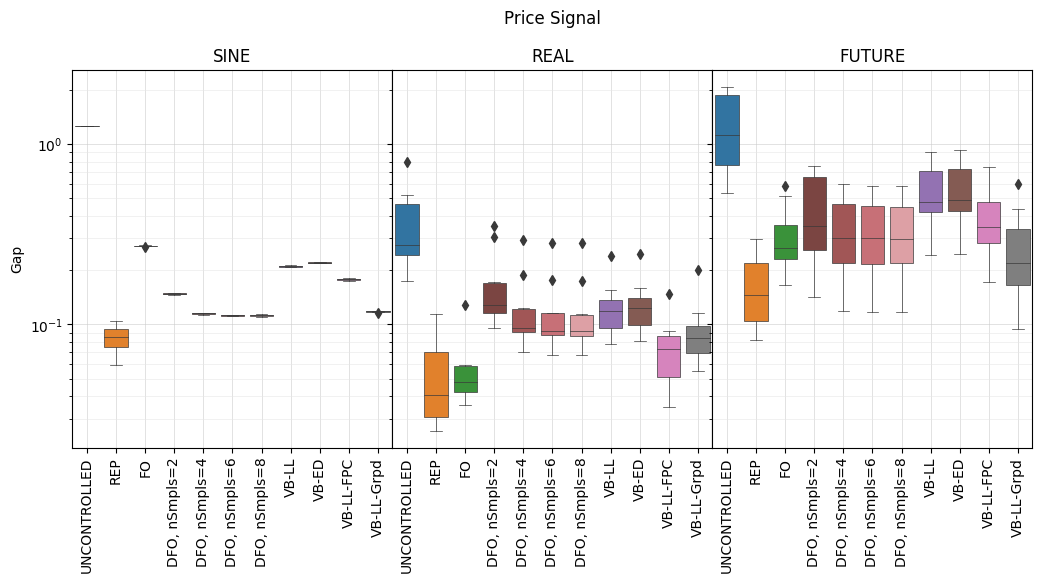

In [5]:
f, ax = plt.subplots(1, 3, sharey=True, gridspec_kw={"wspace": 0}, figsize=(12, 6))


for i, pSignal in enumerate(["SINE", "REAL", "FUTURE"]):
    data = benchmark_data[(benchmark_data.N_Agents == 100_000) & (benchmark_data["Price Signal"] == pSignal) & (benchmark_data["Method"] != "OPTIMAL")].reset_index()
    _ = sns.boxplot(x="Method", y="Gap", data=data, ax=ax[i], linewidth=0.5, palette=palette)

    _ = ax[i].grid(linewidth=0.4, color="0.8", which="major")
    _ = ax[i].grid(linewidth=0.4, color="0.9", which="minor")
    _ = ax[i].set_axisbelow(True)
    _ = ax[i].set_ylabel("")
    _ = ax[i].set_xlabel("")
    _ = ax[i].set_yscale('log')
    _ = ax[i].set_title(pSignal)
    #_ = ax[i].get_legend().remove()
    _ = ax[i].tick_params(axis='x', labelrotation=90)
_ = ax[0].set_ylabel("Gap")
#_ = ax[1].set_xlabel("Price Signal")
_ = f.suptitle('Price Signal')
#_ = ax[0].legend(title="Methods", ncols=1, fontsize=8)
_ = f.subplots_adjust(left=0.1, right=0.9, bottom=0.25)
_ = f.savefig("../results/figures/RsltGap.pdf", dpi=300)

## Sensitivity

In [8]:
import cost_ts as cts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

configs = ["WORK", "WINTER", "P_HIGH", "P_LOW"]
dfs = []
reps = 10
n_agent_options = [100, 1000, 10_000, 100_000]
price_signals =  [cts.PriceSignal.SINE, cts.PriceSignal.REAL, cts.PriceSignal.FUTURE]
n_runs = reps * len(n_agent_options) * len(price_signals)
for n_agents in n_agent_options:
    for price_signal in price_signals:
        for seed in range(reps):
            for conf in configs:
                dfs.append(
                    pd.read_csv(f"../results/data_sensitivity_2/Benchmark_{seed}_{n_agents}_{price_signal}_{conf}.csv", sep=";")
                )
sensitivity_data = pd.concat(dfs)
sensitivity_data["Price Signal"] = sensitivity_data["Price Signal"].replace({"PriceSignal.SINE": "SINE", "PriceSignal.REAL": "REAL", "PriceSignal.FUTURE": "FUTURE"})
sensitivity_data["Method"] = sensitivity_data["Method"].replace(
    {
        "VB": "VB-LL", "VB-FSOE": "VB-LL-FPC", "VB-GRPD": "VB-LL-Grpd", "DFO_2": "DFO, nSmpls=2",
        "DFO_4": "DFO, nSmpls=4",  "DFO_6": "DFO, nSmpls=6",  "DFO_8": "DFO, nSmpls=8"
    }
)

# Create custom colormap
palette = {}
i = 0
for lbl in sensitivity_data["Method"].unique():
    if lbl == "OPTIMAL": continue
    if lbl == "DFO, nSmpls=2":
        palette[lbl] = plt.get_cmap("tab20b")(12)
    elif lbl == "DFO, nSmpls=4":
        palette[lbl] = plt.get_cmap("tab20b")(13)
    elif lbl == "DFO, nSmpls=6":
        palette[lbl] = plt.get_cmap("tab20b")(14)
    elif lbl == "DFO, nSmpls=8":
        palette[lbl] = plt.get_cmap("tab20b")(15)
    else:
        if i == 3:
            i = 4
        palette[lbl] = plt.get_cmap("tab10")(i)
        i += 1

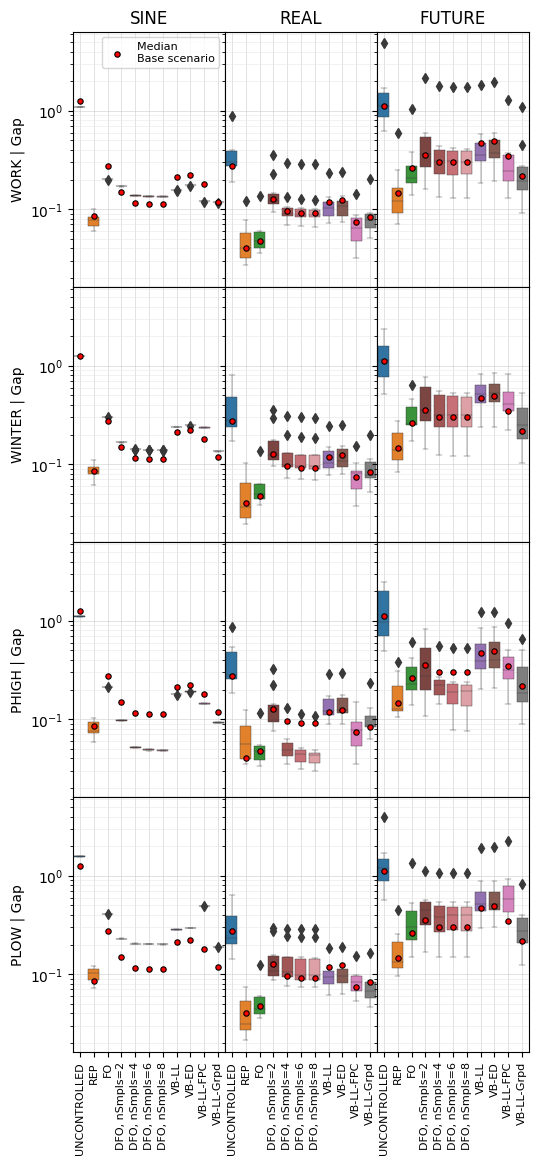

In [12]:
params = [("WORK", "WORK"), ("WINTER", "WINTER"), ("P_HIGH", "PHIGH"), ("P_LOW", "PLOW")]
f, ax = plt.subplots(len(params), 3, sharey=True, gridspec_kw={"wspace": 0, "hspace": 0}, figsize=(6, len(params) * 3), sharex=True)
order = ['UNCONTROLLED', 'REP', 'FO', 'DFO, nSmpls=2', 'DFO, nSmpls=4', 'DFO, nSmpls=6', 'DFO, nSmpls=8',
         'VB-LL', 'VB-ED', 'VB-LL-FPC', 'VB-LL-Grpd']

for j, param in enumerate(params):
    for i, pSignal in enumerate(["SINE", "REAL", "FUTURE"]):
        original_data = benchmark_data[
            (benchmark_data.N_Agents == 100_000)
            & (benchmark_data["Price Signal"] == pSignal)
            & (benchmark_data["Method"] != "OPTIMAL")].reset_index()
        original_medians = original_data.groupby("Method").median(numeric_only=True).Gap[order]

        data = sensitivity_data[
            (sensitivity_data.N_Agents == 100_000) &
            (sensitivity_data["Price Signal"] == pSignal) &
            (sensitivity_data["Method"] != "OPTIMAL") &
            (sensitivity_data["Config"] == param[0])].reset_index()
        _ = sns.boxplot(x="Method", y="Gap", data=data, ax=ax[j, i], linewidth=0.3, palette=palette, order=order)
        _ = ax[j, i].scatter(
            original_medians.index, original_medians.values, color="r", lw=0.8, edgecolor="0", s=15, zorder=100,
            label="Median \nBase scenario"
        )
        
        _ = ax[j, i].grid(linewidth=0.4, color="0.8", which="major")
        _ = ax[j, i].grid(linewidth=0.4, color="0.9", which="minor")
        _ = ax[j, i].set_axisbelow(True)
        _ = ax[j, i].set_ylabel("")
        _ = ax[j, i].set_xlabel("")
        _ = ax[j, i].set_yscale('log')
        _ = ax[j, i].tick_params(axis='x', labelrotation=90, labelsize=8)
        if j == 0:
            _ = ax[j, i].set_title(pSignal)
            if i == 0:
                _ = ax[j, i].legend(fontsize=8)
    _ = ax[j, 0].set_ylabel(param[1] + " | Gap")
_ = f.subplots_adjust(left=0.12, right=0.88, bottom=0.1, top=0.95)
_ = f.savefig("../results/figures/Sensitivity.pdf", dpi=300)
